In [23]:
# Adapted from Cyrille Rossant "IPython Interactive Computing and Visualisation Cookbook", pg 286.
import numpy as np
import numpy.random as rng
import sklearn
import sklearn.datasets as ds
import sklearn.cross_validation as cv
import sklearn.neighbors as nb
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision = 2, suppress = True)

In [24]:
digits = ds.load_digits()
X = digits.data
T = digits.target
print(X.shape, T.shape)
print(X.min(), X.max())

(1797, 64) (1797,)
0.0 16.0


[[  0.   0.   0.   7.  16.  16.  11.   0.]
 [  0.   0.   6.  16.  16.  16.  16.   0.]
 [  0.   0.  11.  16.  16.  16.   9.   0.]
 [  0.   0.   2.   9.  11.  14.  10.   0.]
 [  0.   0.   0.   0.   0.  10.   6.   0.]
 [  0.   0.   0.   0.   4.  11.   1.   0.]
 [  0.   0.   0.   2.  14.   2.   0.   0.]
 [  0.   0.   0.  11.   3.   0.   0.   0.]]
9


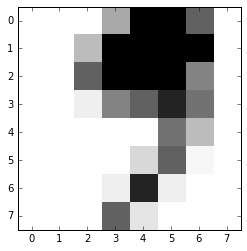

In [25]:
# let's just look at one "image" as raw numbers,
i = rng.randint(len(T))
print(X[i].reshape(8,8))
#  and as an image
plt.imshow(X[i].reshape(8,8), interpolation='nearest', cmap='Greys')
print(T[i])

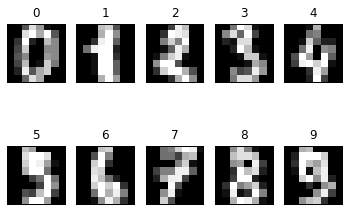

In [26]:
# Look at a whole bunch
nrows, ncols = 2, 5
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i+1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])  # ie. no ticks showing
    plt.title(digits.target[i])

Let's "fit" a K-nearest neighbors classifier on our data. (nb. unclear what "fitting" is actually happening here, if any!).

In [27]:
(X_train, X_test, t_train, t_test) = cv.train_test_split(X, T, test_size=.25)
knc = nb.KNeighborsClassifier()
knc.fit(X_train, t_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Evaluate the score of the "trained" classifier on the test data set:

In [28]:
knc.score(X_test, t_test)

0.98222222222222222

That is actually pretty good, yah? Now let's try KNN on MNIST.

In [29]:
# Note that this might take a while, as fetch_mldata downloads the entire MNIST data set. The default location to 
# store the data is ~/scikit_learn_data, but can be overridden using the data_home argument.
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [30]:
X = mnist.data
T = mnist.target

print(X.shape, T.shape)

(70000, 784) (70000,)


Target:  9.0


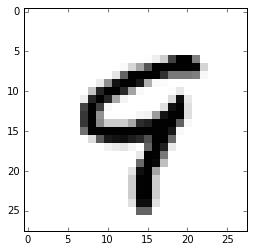

In [31]:
i = rng.randint(len(T))
# This prints out an ugly matrix, but is worth uncommenting if you wish to inspect how these images are stored.
# print(X[i].reshape(28,28))

plt.imshow(X[i].reshape(28,28), interpolation='nearest', cmap='Greys')
print("Target: ", T[i])

In [ ]:
# test_size=.05 for efficiency. Attempt higher at your peril.
(X_train, X_test, t_train, t_test) = cv.train_test_split(X, T, test_size=.05)
knc = nb.KNeighborsClassifier()
knc.fit(X_train, t_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
knc.score(X_test, t_test)